# MACHINE LEARNING GROUP PROJECT 

### Group Members: Helena Krumm (55577),Marouan Kamoun (53833), Mila Gardini (54742), Monica Navas (54577), Yassine Hafi (54466) 

## **Index**
* [Overview and Business Applications](#intro)
* [Dataset Information (Metadata)](#meta)
* [Import libraries](#libraries)
* [Reading and Data Cleaning](#clean)
* [Exploratory Data Analysis](#eda)
* [Model 1 : Decision Tree ](#model1)
* [Model 2 : Logistic Regression ](#model2)
* [Model 3 : ANN ](#model3)
* [Model 4 : Random Forests ](#model4)
* [Model 5 : XG Boosting ](#model5)
* [Model 6 : Ensemble Model ](#model5)
* [Model Comparison](#compare)
* [Best Model Selection and Improvement](#best)
* [Conclusion](#conclusion)
* [Sources](#sources)

<a name="intro"></a>
## Overview and Business applications

Forests are one of the most critical ecosystems on our planet, and they provide a range of benefits to both people and the environment. However, forests around the world are facing numerous threats, including deforestation, invasive species, and climate change impacts. To address these issues, we need a better understanding of the state of the forest ecosystem and the factors that influence forest health. This is where environmental monitoring comes in.

Environmental monitoring is a critical aspect of sustainable forest management, as it allows us to understand the state of the forest ecosystem and identify potential threats to its health. By analyzing the cartographic variables and forest cover type data in this project, we can gain insights into the relationship between different environmental factors and forest health. This information can be used to develop more effective environmental monitoring programs that can help us identify and address issues such as deforestation, invasive species, and climate change impacts. The application of this project lies in the ability to use machine learning models to analyze the environmental variables and make predictions about forest health. Businesses and organizations in the forestry industry can use these predictions to make better decisions about forest management practices, such as where to focus conservation efforts or how to plan for potential climate change impacts. In addition, this information can be used to inform policy decisions around sustainable forest management and conservation.

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. By analyzing this data set using machine learning models, we can gain insights into the relationship between these cartographic variables and forest health. This, in turn, can help us develop more effective environmental monitoring programs that can identify and address issues such as deforestation, invasive species, and climate change impacts.

Overall, this project has significant implications for environmental monitoring and sustainable forest management. By using machine learning to analyze cartographic variables and forest cover type data, we can gain valuable insights into the state of the forest ecosystem and develop more effective environmental monitoring programs. This, in turn, can help us address critical issues facing our forests and ensure their long-term health

## Business Application

<a name="meta"></a>
## Dataset informations

Number of instances (observations):  581,012

Number of Attributes:	12 measures, but 54 columns of data(10 quantitative variables, 4 binary wilderness areas and 40 binary soil type variables)


1.	Attribute information:

Given is the attribute name, attribute type, the measurement unit and a brief description.  The forest cover type is the classification problem. 

    Name                                     Data Type    Measurement                       Description

    Elevation                               quantitative    meters                       Elevation in meters
    Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
    Slope                                   quantitative    degrees                      Slope in degrees
    Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
    Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
    Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
    Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
    Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
    Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
    Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
    Wilderness_Area (4 binary columns)      qualitative     0 (absence) or 1 (presence)  Wilderness area designation
    Soil_Type (40 binary columns)           qualitative     0 (absence) or 1 (presence)  Soil Type designation
    Cover_Type (7 types)                    integer         1 to 7                       Forest Cover Type designation


Code Designations:

    Wilderness Areas:  	1 -- Rawah Wilderness Area
                        2 -- Neota Wilderness Area
                        3 -- Comanche Peak Wilderness Area
                        4 -- Cache la Poudre Wilderness Area

Soil Types:             1 to 40 : based on the USFS Ecological
                        Landtype Units (ELUs) for this study area:


      Forest Cover Type Classes:	1 -- Spruce/Fir
                                    2 -- Lodgepole Pine
                                    3 -- Ponderosa Pine
                                    4 -- Cottonwood/Willow
                                    5 -- Aspen
                                    6 -- Douglas-fir
                                    7 -- Krummholz


2.  Basic Summary Statistics for quantitative variables only
	(whole dataset -- thanks to Phil Rennert for the summary values):

            Name                                    Units             Mean   Std Dev
            Elevation                               meters          2959.36  279.98
            Aspect                                  azimuth          155.65  111.91
            Slope                                   degrees           14.10    7.49
            Horizontal_Distance_To_Hydrology        meters           269.43  212.55
            Vertical_Distance_To_Hydrology          meters            46.42   58.30
            Horizontal_Distance_To_Roadways         meters          2350.15 1559.25
            Hillshade_9am                           0 to 255 index   212.15   26.77
            Hillshade_Noon                          0 to 255 index   223.32   19.77
            Hillshade_3pm                           0 to 255 index   142.53   38.27
            Horizontal_Distance_To_Fire_Points      meters          1980.29 1324.19


3.	Missing Attribute Values:  None.


4.	Class distribution:

           Number of records of Spruce-Fir:                211840 
           Number of records of Lodgepole Pine:            283301 
           Number of records of Ponderosa Pine:             35754 
           Number of records of Cottonwood/Willow:           2747
           Number of records of Aspen:                       9493 
           Number of records of Douglas-fir:                17367 
           Number of records of Krummholz:                  20510  
           Number of records of other:                          0  


<a name="libraries"></a>
## Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import balanced_accuracy_score, recall_score, confusion_matrix, classification_report, mean_squared_error, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



import warnings
warnings.filterwarnings("ignore")

<a name="clean"></a>
## Data Loading and Cleaning

In [18]:
df=pd.read_csv("./dataset/covtype_data.csv")

# Define column names
col_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology ',
             'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
             'Horizontal_Distance_To_Fire_Points']

# Generate names for binary columns based on their position
binary_col_names = [i+1 for i in range(4)]
binary_col_names += [i+1 for i in range(40)]

# Append the binary column names to the list of column names
col_names += binary_col_names

# Append the target variable name to the list of column names
col_names.append('Cover_Type_code')

# Rename the columns in the DataFrame
df.columns = col_names
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,32,33,34,35,36,37,38,39,40,Cover_Type_code
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [19]:
#Grouping the soil type columns into 1 column
df['Soil type code'] = df.iloc[:, 14:54].idxmax(axis=1)
df = pd.concat([df.iloc[:, :14], df.iloc[:, 54:]], axis=1)
#Grouping the Wilderness Areas columns into 1 column
df['Wilderness area code'] = df.iloc[:, 10:14].idxmax(axis=1)
df = pd.concat([df.iloc[:, :10], df.iloc[:, 14:]], axis=1)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type_code,Soil type code,Wilderness area code
0,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
1,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
2,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
3,2595,45,2,153,-1,391,220,234,150,6172,5,29,1
4,2579,132,6,300,-15,67,230,237,140,6031,2,29,1


In [20]:
df1=df.copy()
#add a column with the description of codes for Soil type and wilderness areas
Wilderness_areas_list=['Rawah Wilderness Area','Neota Wilderness Area','Comanche Peak Wilderness Area' ,'Cache la Poudre Wilderness Area']
df1['Wilderness area description']=[Wilderness_areas_list[col-1] for col in df1['Wilderness area code']]

list_of_soil_type=pd.read_csv("./dataset/list_of_soil_types.csv")
list_of_soil_type=list(list_of_soil_type)
df1['soil type description']=[list_of_soil_type[col-1] for col in df1['Soil type code']]

new_order = [col for col in df1.columns if col != 'Cover_Type_code'] + ['Cover_Type_code']
df1 = df1[new_order]

cover_type_list=['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']
df1['cover type description']=[cover_type_list[col-1] for col in df1['Cover_Type_code']]
df1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil type code,Wilderness area code,Wilderness area description,soil type description,Cover_Type_code,cover type description
0,2590,56,2,212,-6,390,220,235,151,6225,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",5,Aspen
1,2804,139,9,268,65,3180,234,238,135,6121,12,1,Rawah Wilderness Area,"Legault family - Rock land complex, stony.",2,Lodgepole Pine
2,2785,155,18,242,118,3090,238,238,122,6211,30,1,Rawah Wilderness Area,Como family - Rock land - Legault family compl...,2,Lodgepole Pine
3,2595,45,2,153,-1,391,220,234,150,6172,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",5,Aspen
4,2579,132,6,300,-15,67,230,237,140,6031,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",2,Lodgepole Pine


<a name="eda"></a>
## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in the data analysis process that aims to summarize, visualize, and understand the underlying structure and patterns in a dataset. This helps in identifying trends, anomalies, and potential relationships among variables, which can ultimately lead to the development of appropriate statistical models and hypothesis testing.

In the given project, the goal is to predict forest cover types based on cartographic variables, with data derived from the US Forest Service (USFS) and the US Geological Survey (USGS). The dataset consists of binary columns representing wilderness areas and soil types, as well as the target variable, which is the forest cover type.

To perform the EDA, the team started by defining column names and generating names for binary columns based on their position. These binary column names were then appended to the list of column names, along with the target variable (cover type). After renaming the columns in the dataframe, the team proceeded to analyze the numerical columns by printing summary statistics. This helped to gain a better understanding of the central tendencies and dispersion within the data.

To further explore the distribution of the target variable, we printed the count of each target value and created a histogram. This provided insights into the frequency of different forest cover types and highlighted potential imbalances in the dataset. By examining the dataset in this manner, our group was able to identify trends, patterns, and potential relationships among variables, which will help in selecting appropriate techniques for modeling and prediction in the next stages of the project.

In [21]:
# Print the summary statistics of the numerical columns
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type_code,Soil type code,Wilderness area code
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,2.051465,24.362435,2.114464
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,1.396500,9.485412,1.061295
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000,20.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,29.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000,31.000000,3.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000,40.000000,4.000000


The count, mean, min, and max rows are self-explanatory. The std row shows the standard deviation (which measures how dispersed the values are). The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls.

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute.

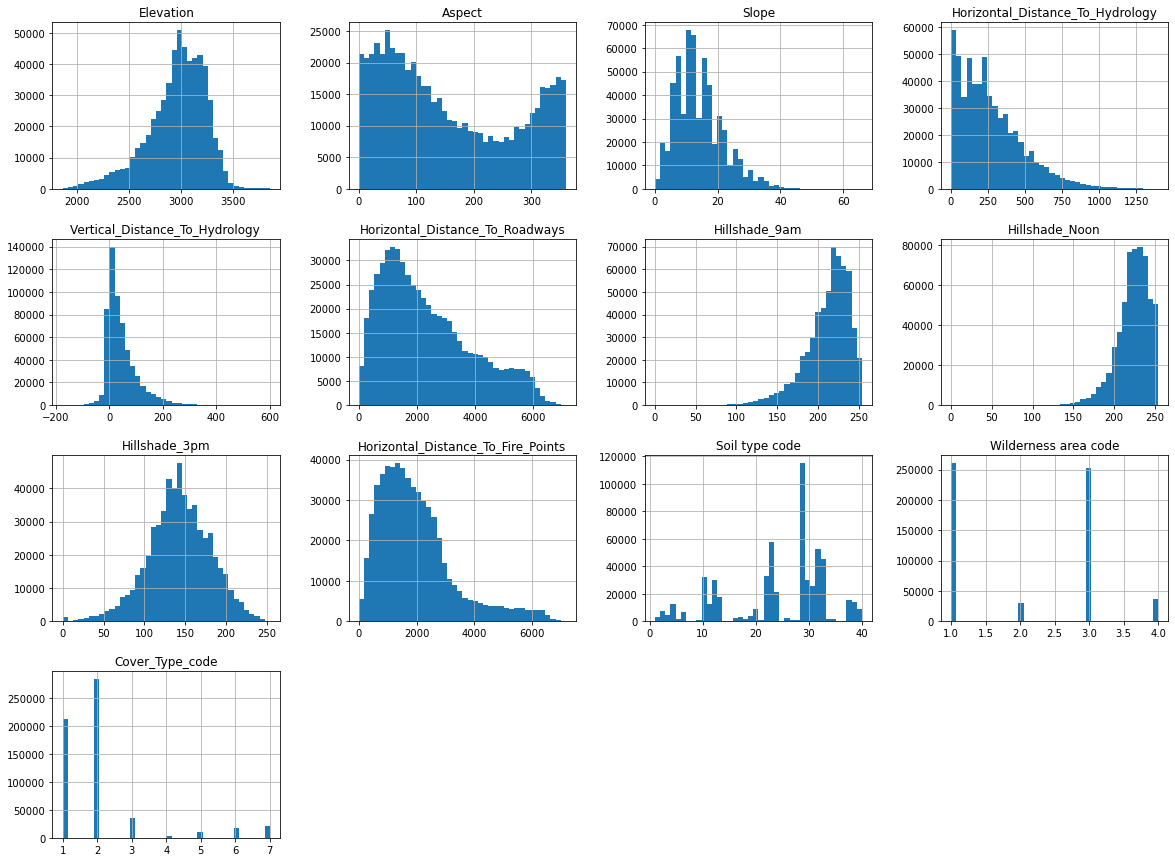

In [22]:
df1.hist(bins=40, figsize=(20,15))
plt.show()

The histogram plot shows the distribution of all the numeric columns in the dataset.

The "Elevation" column seems to be roughly normally distributed, with the majority of values falling in the range of 2500-3300.

The "Aspect" column appears to have a roughly uniform distribution, with no clear trend or peak in the data.

The "Slope" column has a right-skewed distribution, indicating that the majority of slopes are relatively gentle, with a long tail of steeper slopes.

The "Horizontal_Distance_To_Hydrology" and "Vertical_Distance_To_Hydrology" columns both have a strong peak at 0, indicating that many of the observations have no distance to hydrology.

The "Horizontal_Distance_To_Roadways" column is roughly normally distributed, with a peak around 0-500.

The "Hillshade" columns (9am, Noon, and 3pm) are all roughly normally distributed, with peaks around 200-255.

The "Horizontal_Distance_To_Fire_Points" column is right-skewed, indicating that the majority of observations have relatively short distances to fire points.

Now we divide the data to train and test sets to explore the train set only.

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)
train = train_set.copy()

In [24]:
corr_matrix = train.corr()
corr_matrix

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil type code,Wilderness area code,Cover_Type_code
Elevation,1.000000,0.016514,-0.243424,0.305393,0.092062,0.365637,0.112343,0.206576,0.059700,0.147743,0.689688,-0.315614,-0.268716
Aspect,0.016514,1.000000,0.078070,0.017432,0.070243,0.025402,-0.578757,0.336020,0.646801,-0.107759,0.007680,0.138176,0.016621
Slope,-0.243424,0.078070,1.000000,-0.010450,0.275348,-0.216400,-0.327024,-0.528249,-0.176983,-0.185892,-0.105275,0.286982,0.149232
Horizontal_Distance_To_Hydrology,0.305393,0.017432,-0.010450,1.000000,0.605444,0.072132,-0.027187,0.047574,0.052748,0.051793,0.194134,0.056047,-0.020585
Vertical_Distance_To_Hydrology,0.092062,0.070243,0.275348,0.605444,1.000000,-0.047233,-0.166351,-0.110665,0.034914,-0.070503,0.070937,0.189172,0.081706
Horizontal_Distance_To_Roadways,0.365637,0.025402,-0.216400,0.072132,-0.047233,1.000000,0.034945,0.189715,0.105999,0.331230,0.240504,-0.446084,-0.152799
Hillshade_9am,0.112343,-0.578757,-0.327024,-0.027187,-0.166351,0.034945,1.000000,0.011146,-0.779769,0.132243,0.040163,-0.233395,-0.035737
Hillshade_Noon,0.206576,0.336020,-0.528249,0.047574,-0.110665,0.189715,0.011146,1.000000,0.594187,0.058238,0.013856,-0.081969,-0.096688
Hillshade_3pm,0.059700,0.646801,-0.176983,0.052748,0.034914,0.105999,-0.779769,0.594187,1.000000,-0.047078,-0.000417,0.104196,-0.048396
Horizontal_Distance_To_Fire_Points,0.147743,-0.107759,-0.185892,0.051793,-0.070503,0.331230,0.132243,0.058238,-0.047078,1.000000,0.100218,-0.416441,-0.108663


#### Distribution of cover type

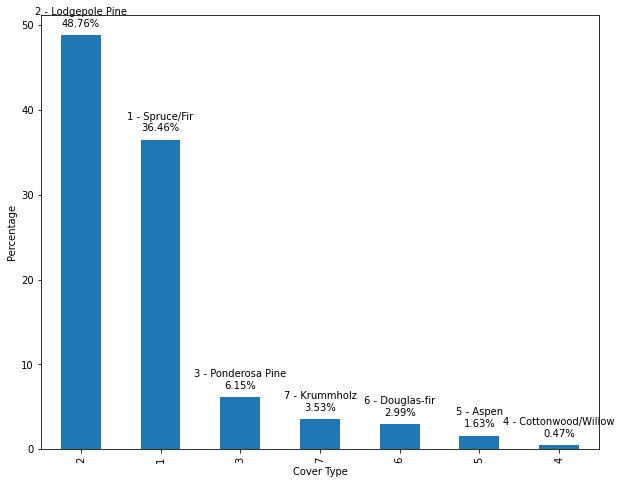

In [25]:
# plot a histogram of the distribution'cover type description' column
plt.figure(figsize=(10, 8))
percentage = df1['Cover_Type_code'].value_counts(normalize=True) * 100
# create a bar plot of the percentages of each unique value in the 'cover type description' column
percentage.plot(kind='bar')
# display the plot
plt.xlabel('Cover Type')
plt.ylabel('Percentage')

# add percentage labels to the bars
for index, value in enumerate(percentage):
    code = percentage.index[index]
    desc = df1[df1['Cover_Type_code'] == code]['cover type description'].unique()[0]
    plt.text(index, value + 1, f'{code} - {desc}\n{round(value, 2)}%', ha='center')

plt.show()

#### Distribution of elevation

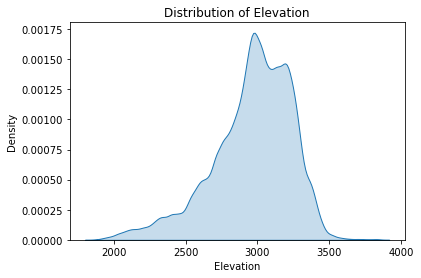

In [26]:
# Create a density plot of the 'elevation' column
sns.kdeplot(df1['Elevation'], shade=True)
plt.xlabel('Elevation')
plt.ylabel('Density')
plt.title('Distribution of Elevation')
plt.show()

<AxesSubplot:xlabel='Cover_Type_code', ylabel='Elevation'>

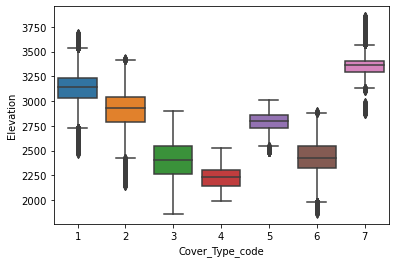

In [27]:
sns.boxplot(x='Cover_Type_code', y='Elevation', data=df1)

From the plot, we can see that Cover_Type_code 1, 2, and 7 have relatively higher median elevations than the other categories. In contrast, Cover_Type_code 3 and 4 have lower median elevations.

#### Distribution of Aspect

#### Distribution of wilderness area

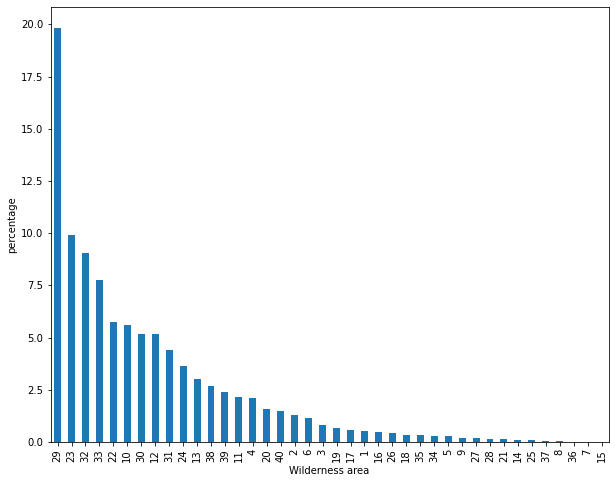

In [28]:
# plot a histogram of the distribution'cover type description' column
plt.figure(figsize=(10, 8))
percentage = df1['Soil type code'].value_counts(normalize=True) * 100
# create a bar plot of the percentages of each unique value in the 'Wilderness area description' column
percentage.plot(kind='bar')
# display the plot
plt.xlabel('Wilderness area')
plt.ylabel('percentage')

plt.show()

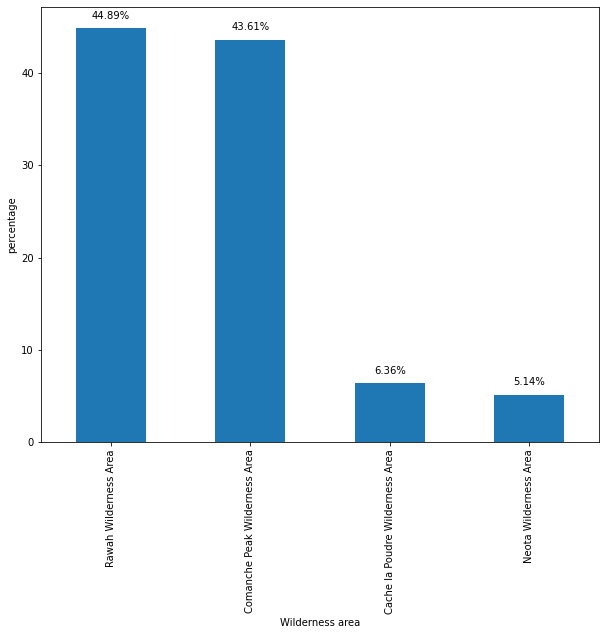

In [29]:
# plot a histogram of the distribution'cover type description' column
plt.figure(figsize=(10, 8))
percentage = df1['Wilderness area description'].value_counts(normalize=True) * 100
# create a bar plot of the percentages of each unique value in the 'Wilderness area description' column
percentage.plot(kind='bar')
# display the plot
plt.xlabel('Wilderness area')
plt.ylabel('percentage')

# add percentage labels to the bars
for index, value in enumerate(percentage):
    plt.text(index, value + 1, str(round(value, 2)) + '%', ha='center')
plt.show()

# Models:

In order to predict forest cover types based on cartographic variables, our team has selected three machine learning models, which are well-suited to this dataset: classification, decision tree, and clustering.

Decision Tree: Decision trees are an ideal choice for our dataset because they can handle both numerical and categorical features, like the binary columns for wilderness areas and soil types. These models are easily interpretable and can capture non-linear relationships between features and the target variable. Moreover, they are capable of selecting the most relevant features for prediction, which can help improve overall model performance.

Clustering: Although clustering models are typically used for unsupervised learning, they can be adapted to predict forest cover types by applying a semi-supervised approach. This involves using clustering algorithms, such as k-means or hierarchical clustering, to group similar data points in the feature space. Once clusters are formed, we can assign the majority class of each cluster as its representative forest cover type. This method can be particularly useful when the dataset exhibits clear patterns or groups that correspond to different cover types.

Classification: We chose a classification model because our problem is a multiclass classification task, where the goal is to predict one of several possible forest cover types. Classification models, such as logistic regression, support vector machines (SVM), and k-nearest neighbors (KNN), can effectively predict categorical outcomes by learning patterns in the dataset and drawing decision boundaries between different classes.

By employing these three machine learning models, we aim to harness their unique strengths and capabilities in order to accurately predict forest cover types for our dataset. Through rigorous model evaluation and comparison, we will select the best-performing model that achieves the highest prediction accuracy and generalization performance.

* Decision Tree
* Logistic Regression
* Neural Network
* GBoosting
* Random Forests

### Definining Features and Target Variables for our models

In ML, having a large amount of data is crucial for training models that can accurately make predictions. However, processing large datasets can be computationally expensive and time-consuming, especially when running multiple models. Therefore, using a smaller subset of the data can help to reduce the time and computational resources required for training and testing models.

In this case, using a subset of 100,000 instances allows us to build and test multiple models quickly without sacrificing too much data. By randomly selecting a subset, we can ensure that the sample is representative of the larger dataset while reducing the overall size of the data. This approach can be particularly useful when dealing with big data, where even a small subset can be sufficiently representative of the entire dataset.

Moreover, using a smaller subset can also help to avoid overfitting, which occurs when a model is trained too closely on the training data and fails to generalize to new data. By using a smaller subset, we can limit the complexity of the models we build, making them less likely to overfit.

In [40]:
# Choose a random subset of the data (because the dataset is too large)
subset_size = 100000 # Change this value to the desired subset size
random_indices = np.random.choice(df.index, subset_size, replace=False)
df_subset = df.loc[random_indices]

ADD EXPLANATION THAT DISTRIBUTION HAS NOT BEEN AFFECTED

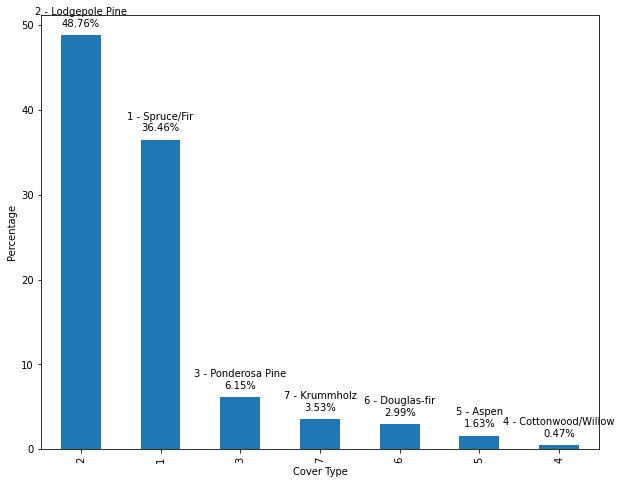

In [39]:
# plot a histogram of the distribution'cover type description' column
plt.figure(figsize=(10, 8))
percentage = df1['Cover_Type_code'].value_counts(normalize=True) * 100
# create a bar plot of the percentages of each unique value in the 'cover type description' column
percentage.plot(kind='bar')
# display the plot
plt.xlabel('Cover Type')
plt.ylabel('Percentage')

# add percentage labels to the bars
for index, value in enumerate(percentage):
    code = percentage.index[index]
    desc = df1[df1['Cover_Type_code'] == code]['cover type description'].unique()[0]
    plt.text(index, value + 1, f'{code} - {desc}\n{round(value, 2)}%', ha='center')

plt.show()

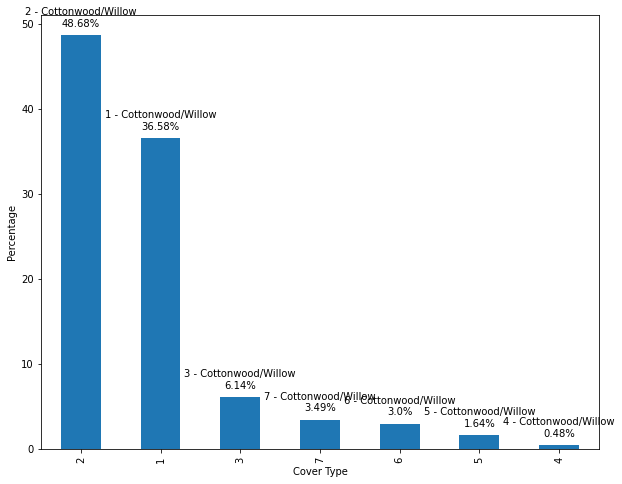

In [42]:
# plot a histogram of the distribution'cover type description' column
plt.figure(figsize=(10, 8))
percentage = df_subset['Cover_Type_code'].value_counts(normalize=True) * 100
# create a bar plot of the percentages of each unique value in the 'cover type description' column
percentage.plot(kind='bar')
# display the plot
plt.xlabel('Cover Type')
plt.ylabel('Percentage')

# add percentage labels to the bars
for index, value in enumerate(percentage):
    code = percentage.index[index]
    #desc = df_subset[df_subset['Cover_Type_code'] == code]['cover type description'].unique()[0]
    plt.text(index, value + 1, f'{code} - {desc}\n{round(value, 2)}%', ha='center')

plt.show()

The input data consists of five features: "Wilderness area code", "Elevation", "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points", and "Soil type code". These features are used to predict the cover type, which is a categorical variable represented by the "Cover_Type_code" column.

**EXPLAIN WHY WE CHOSE THOSE FEATURES**

In [35]:
# Separate features and target variable

#X = df_subset.drop("Cover_Type_code", axis=1)
X = df_subset[["Wilderness area code", "Elevation", "Soil type code", 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Slope',"Hillshade_Noon","Hillshade_3pm"]]
y = df_subset["Cover_Type_code"]
#X = df[["Wilderness area code", "Elevation", 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Soil type code']]
#y = df["Cover_Type_code"]

### Splitting the dataset into training and testing

Dividing the dataset into training and testing sets is an essential step in machine learning to evaluate the performance of the model. In this case, the dataset is split into 80% training data and 20% testing data.

The reason for using an 80/20 split is that it strikes a balance between having enough data to train the model while still having a sufficient amount of data to evaluate the model's performance. The training data is used to fit the model parameters, while the testing data is used to evaluate how well the model generalizes to new, unseen data.

If we use too little data for training, the model may not learn the underlying patterns in the data correctly, resulting in poor performance. Conversely, if we use too much data for training, the model may overfit, which means it will perform well on the training data but poorly on the testing data.

The 80/20 split is a common default choice for many machine learning applications, but it can be adjusted based on the size and complexity of the dataset and the problem being solved. For example, if the dataset is small, we may need to use a higher percentage of the data for training, such as a 70/30 split. In contrast, if the dataset is large, we may use a smaller percentage for training, such as a 90/10 split.

In [36]:
# Split the dfset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Why Accuracy Evaluation ?

Accuracy is a commonly used evaluation metric in classification problems because it is easy to understand and interpret. It measures the proportion of correctly classified instances out of the total instances in the dataset. In your project, accuracy was used to evaluate the performance of the machine learning models for classifying forest cover types.

However, accuracy might not always be the best evaluation metric, especially when dealing with imbalanced datasets, where some classes have a significantly higher number of instances compared to others. In such cases, a high accuracy could be misleading, as the model might simply be good at classifying the majority class while performing poorly on minority classes.

There are other evaluation metrics that can provide a more comprehensive view of the model's performance, such as:

- Precision: The proportion of true positive instances out of the instances predicted as positive. It measures the model's ability to correctly identify positive instances.
- Recall: The proportion of true positive instances out of the actual positive instances. It measures the model's ability to identify all the positive instances.
- F1 Score: The harmonic mean of precision and recall. It provides a balanced measure between precision and recall, and is especially useful when dealing with imbalanced datasets.
- Confusion Matrix: A table that shows the true positive, false positive, true negative, and false negative predictions of a classifier. It helps to identify the types of errors the model is making.
- Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC): A plot that illustrates the true positive rate (sensitivity) against the false positive rate (1-specificity) for different threshold values. AUC-ROC is a measure of how well the model can distinguish between classes.


<a name="model1"></a>

## 1. Decision Tree

Accuracy: 0.7797394773036851
Recall: 0.7797394773036851


KeyboardInterrupt: 

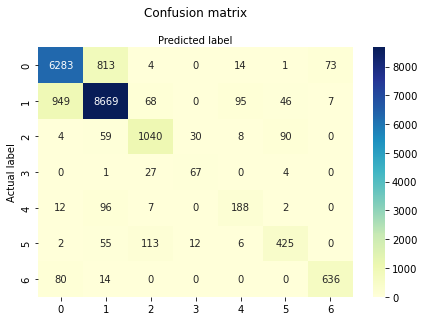

Error in callback <function flush_figures at 0x7fac80072670> (for post_execute):


KeyboardInterrupt: 

In [45]:
features = list(X.columns)

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier with a range of depths to search
clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": range(1, 4),
    "min_samples_split": range(2, 4, 2),
    "min_samples_leaf": range(1, 4, 2)
}

#decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)

# Use GridSearchCV to find the best hyperparameters
#grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", cv=5, n_jobs=-1)
clf.fit(X_train, y_train)
#best_clf = grid_search.best_estimator_

# Make predictions on the testing dataset
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the balanced accuracy of the model
b_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {b_accuracy:.2f}")

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names = [0, 1, 2, 3, 4, 5, 6]  # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names=features, class_names=['0', '1', '2', '3', '4', '5', '6'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['0', '1', '2', '3', '4', '5', '6']
print(classification_report(y_test, y_pred, target_names=target_names))

For now we will remove max deph to improve the aacuracy of our decision tree

<a name="model2"></a>
# 2. Logistic Regression

We decided to use a logistic regression model for this task due to its simplicity, interpretability, and effectiveness in many classification problems. We performed feature scaling with StandardScaler by removing the mean and scaling to unit variance to standardize the input features due to scaling sensitivity. This way, we ensure that all features have the same scale, which helps the logistic regression algorithm converge faster and provide better performance.

After feature scaling, we proceeded to train the logistic regression model using the LogisticRegression class from the scikit-learn library. We set the maximum number of iterations to 1000 to give the optimization algorithm enough iterations to converge to an optimal solution. In some cases, logistic regression models may require more iterations to find the optimal weights, especially when dealing with complex datasets or large feature spaces. By setting a higher number of iterations, we can ensure that the optimization algorithm has sufficient opportunities to find the best solution within the given constraint.

We used the 'lbfgs' solver as it is a popular optimization algorithm for logistic regression. This algorithm is an efficient optimization technique that approximates the BFGS algorithm using a limited amount of memory. This solver is suitable for large-scale problems and can handle a wide range of data sizes and complexities. Additionally, the 'lbfgs' solver works well with L2 regularization, which is commonly used in logistic regression to prevent overfitting and improve generalization.

We specified the multi_class parameter as 'multinomial' to handle the multi-class classification problem. In a multi-class classification problem, there are more than two classes to predict. The 'multinomial' option enables the logistic regression model to handle such problems by using the softmax function to estimate probabilities for each class. The softmax function is a generalization of the logistic function that can handle multiple classes, converting the model's output into class probabilities. By using the 'multinomial' option, we ensure that our logistic regression model is well-suited to handle the multi-class nature of the cover type classification problem.

Once the logistic regression model was trained, we made predictions on the test set and evaluated its performance using accuracy as the performance metric. Accuracy is a common metric used to measure the proportion of correct predictions made by the model out of the total number of predictions. We also performed cross-validation to assess the model's generalization capability. Cross-validation is a technique used to estimate the performance of a model on unseen data by splitting the training data into multiple subsets, training the model on each subset, and evaluating the performance on the remaining data. In our case, we used 5-fold cross-validation, which means that the training data was split into five equal parts.

In [56]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

b_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {b_accuracy:.2f}")

# Perform cross-validation
#cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
#print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")


Accuracy: 0.64
Accuracy: 0.33


<Figure size 432x288 with 0 Axes>

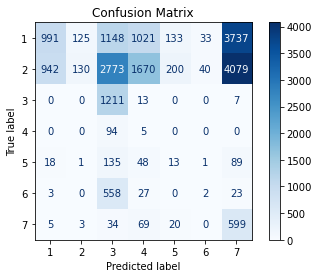

In [50]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(logreg, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

ADD CONFUSION MATRIX EXPLANATIONS

We also performed hyperparameter tuning to find the best parameters for our model. However, this didn't improve the accuracy of the model.

In [ ]:
# Create a pipeline for data scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, multi_class='multinomial'))
])

# Set up a grid of hyperparameters for tuning
param_grid = {
    'logreg__solver': ['lbfgs', 'sag', 'saga'],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the testing set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(best_model)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

We chose logistic regression with feature scaling for this cover type classification task due to its simplicity, interpretability, and effectiveness for such problems. We also evaluated the model using accuracy and cross-validation to ensure its generalizability to unseen data.

While logistic regression is a simple and interpretable model often used for classification problems, it may not always be the best choice depending on the complexity and nature of the problem. In our case, the reported accuracy of 0.71 indicates that the model's performance is not optimal compared to other models.

<a name="model3"></a>
# 3. Artificial Neural Networks

We used a simple feedforward neural network (also known as a multilayer perceptron) for predicting cover types, which is a classification problem. The model is implemented using the Keras library. 

We used the StandardScaler from scikit-learn to normalize the features. This is important as it helps to ensure that all features have a similar scale, which can improve the performance of the model.


We ensured that the target variable is integer-encoded and starts from 0, which is required when using 'sparse_categorical_crossentropy' as the loss function. The model consists of an input layer, two hidden layers with 10 neurons each, and an output layer. The activation functions used are ReLU (rectified linear unit) for the hidden layers and softmax for the output layer. Softmax is used for the output layer because it is suitable for multi-class classification problems, as it converts the output into probabilities that sum to 1.

The model is compiled using 'sparse_categorical_crossentropy' as the loss function and the 'adam' optimizer. The 'sparse_categorical_crossentropy' loss function is suitable for multi-class classification problems with integer-encoded labels. We trained the model for 50 epochs with a batch size of 10.


CAN ONLY BE RUN ON GOOGLE COLAB
TAKES 1O MIN TO RUN AND GIVES AN ACCRACY OF **0.73965**

The achieved accuracy of 0.73 might not be optimal for some applications, and other models might perform better. Some reasons to consider other models include that the chosen model is relatively simple and may not capture the complexity of the relationship between the features and the target variable.

Moreover, the number of layers, neurons, and activation functions were selected arbitrarily, and a more systematic approach (e.g., using a grid search or randomized search) might lead to better model configurations.

Other models, such as decision trees, random forests, support vector machines, or gradient boosting machines, might have better performance on this particular problem. Ensemble methods, which combine multiple models, can also lead to improved accuracy.

<a name="model4"></a>
# 4. Random Forests

The code is using the Random Forest Classifier algorithm to classify the cover type of a forest based on a number of environmental variables such as elevation, slope, and soil type. However, the dataset may contain irrelevant or redundant features that could negatively impact the accuracy of the model, and also increase the risk of overfitting

To avoid overfitting, it's important to identify and remove any unnecessary features that do not contribute significantly to the performance of the model

In [57]:
# Model Random Forest : 

#try performing feature selection to identify and remove any unnecessary features .
#This improves the performance of the model and reduce overfitting

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Perform feature selection
from sklearn.feature_selection import SelectFromModel

# Create a random forest classifier with 10 trees
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Evaluate the balanced accuracy of the model
b_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {b_accuracy:.2f}")

Accuracy: 0.88
Balanced Accuracy: 0.76


<a name="model5"></a>
# 5. XG Boosting

Accuracy (XGBOOST): 0.74
Balanced Accuracy: 0.55


<Figure size 432x288 with 0 Axes>

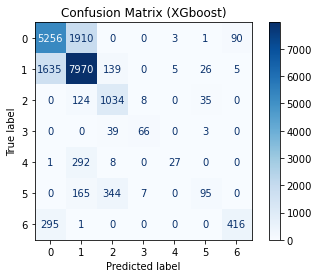

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      7260
           1       0.76      0.81      0.79      9780
           2       0.66      0.86      0.75      1201
           3       0.81      0.61      0.70       108
           4       0.77      0.08      0.15       328
           5       0.59      0.16      0.25       611
           6       0.81      0.58      0.68       712

    accuracy                           0.74     20000
   macro avg       0.74      0.55      0.58     20000
weighted avg       0.74      0.74      0.73     20000



In [65]:
import xgboost as xgb

# Ensure the target variable is integer-encoded (starting from 0)
y_train = y_train + 1
y_test = y_test + 1

# Train an  XGBoosting model
gb_model = xgb.XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_model.predict(X_test)
# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred)
print(f"Accuracy (XGBOOST): {accuracy_gb:.2f}")

# Evaluate the balanced accuracy of the model
b_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {b_accuracy:.2f}")


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(gb_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix (XGboost)")
plt.show()

# Classification report
report_gb = classification_report(y_test, y_pred)
print("Classification Report (Gradient Boosting):\n", report_gb)


<a name="model6"></a>
## Ensemble Model

An ensemble model combines multiple individual models to improve the overall performance. One common ensemble technique is the Voting Classifier, which takes the majority vote of different classifiers to make the final prediction. Here's a Voting Classifier using scikit-learn with a Random Forest, a Support Vector Machine, and a Gradient Boosting Classifier.

In this example, we create a Voting Classifier that combines a Random Forest, a Support Vector Machine (with a radial kernel), and a Gradient Boosting Classifier. 

The voting parameter is set to 'soft', which means that the classifier will predict the class label based on the argmax of the class probabilities, calculated as the average of the predicted probabilities of the individual classifiers.

It is possible to experiment with different combinations of classifiers and their hyperparameters to find the best performing ensemble for your problem. 

In [ ]:
# Create the individual classifiers
clf1 = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf2 = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))
clf3 = GradientBoostingClassifier(n_estimators=50, random_state=42, n_iter_no_change=5, tol=0.01)

# Create the ensemble model (Voting Classifier)
eclf = VotingClassifier(estimators=[('rf', clf1), ('svc', clf2), ('gb', clf3)], voting='soft')

# Train the ensemble model
eclf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = eclf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

To optimize the model we can perform hyperparameter tuning to find the best parameters for the model. We used Grid Search:

In [ ]:
# Create the individual classifiers with placeholder hyperparameters
clf1 = RandomForestClassifier(random_state=42)
clf2 = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True, random_state=42))
clf3 = GradientBoostingClassifier(random_state=42)

# Create the ensemble model (Voting Classifier)
eclf = VotingClassifier(estimators=[('rf', clf1), ('svc', clf2), ('gb', clf3)], voting='soft')

# Define the hyperparameters to search
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'svc__svc__C': [0.1, 1, 10],
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=eclf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid.best_params_)

# Make predictions on the test set using the best ensemble model found
y_pred = grid.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

<a name="compare"></a>
## Model Comparison



<a name="best"></a>
## Best Model Selection and Improvement


In [ ]:
# Model Random Forest : 

#try performing feature selection to identify and remove any unnecessary features .
#This improves the performance of the model and reduce overfitting

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Perform feature selection
from sklearn.feature_selection import SelectFromModel

# Create a random forest classifier with 10 trees
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Create a feature selection object
selector = SelectFromModel(rfc)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Transform the training and testing data to only include the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Fit the model to the training data using only the selected features
rfc_selected = RandomForestClassifier(n_estimators=10, random_state=42)
rfc_selected.fit(X_train_selected, y_train)

# Make predictions on the testing data using only the selected features
y_pred_selected = rfc_selected.predict(X_test_selected)

# Calculate the accuracy of the model using only the selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print("Accuracy (with feature selection):", accuracy_selected)

# Fit the selector to the training data
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", list(selected_features))

rfc_selected.feature_importances_

<a name="conclusion"></a>
## Conclusions



<a name="sources"></a>
## Sources

Original Owners of Database: 

Remote Sensing and GIS Program 

Department of Forest Sciences

College of Natural Resources

Colorado State University 

Fort Collins, CO 80523 

(contact Jock A. Blackard, jblackard@fs.fed.us or Dr. Denis J. Dean, denis.dean@utdallas.edu) 